In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [2]:
fac = pd.read_csv('facup_v2.csv')

fac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 137229
Data columns (total 16 columns):
Unnamed: 0    137230 non-null int64
away_score    137230 non-null int64
away_team     137230 non-null object
date          137230 non-null object
home_score    137230 non-null int64
home_team     137230 non-null object
match_id      137230 non-null float64
qualifier     137230 non-null bool
replay        137230 non-null bool
round         137230 non-null object
round_id      137230 non-null float64
stage         137230 non-null float64
year          137230 non-null int64
year_id       137230 non-null int64
team          137230 non-null object
home          137230 non-null bool
dtypes: bool(3), float64(3), int64(5), object(5)
memory usage: 15.1+ MB


In [3]:
matches_per_year = fac.groupby('year')['match_id'].nunique().reindex(range(1872,2016))

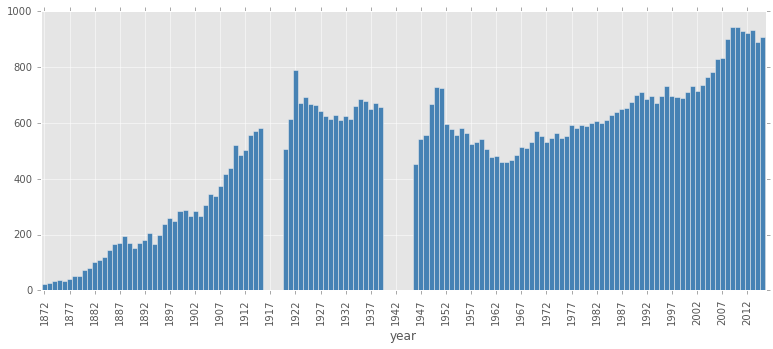

In [4]:
%matplotlib inline

matplotlib.style.use('ggplot')

ax = matches_per_year.plot(kind='bar', 
                         figsize=(13,5), 
                         width=1, 
                         color='steelblue')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])

plt.show()

In [5]:
#no. of qualifiers/non qualifiers per year

q = fac[fac['qualifier'] == True] 
nq = fac[fac['qualifier'] == False]

q.match_id.size + nq.match_id.size #checking that all rows are accounted for

137230

In [6]:
q_per_year = q.groupby('year')['match_id'].nunique().reindex(range(1872,2016)) * -1
nq_per_year = nq.groupby('year')['match_id'].nunique().reindex(range(1872,2016))

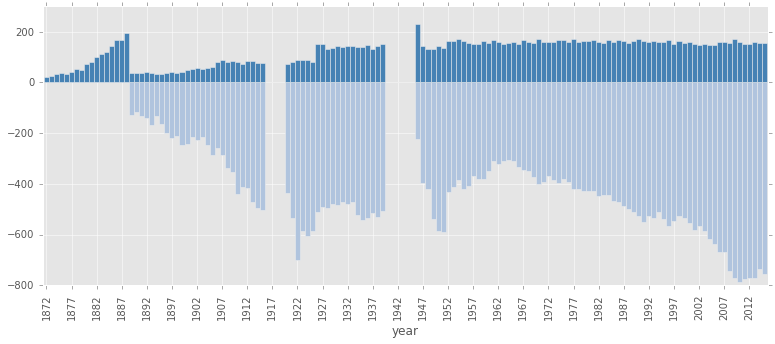

In [7]:
q_per_year.plot(kind='bar', 
                 figsize=(13,5), 
                 width=1, 
                 color='lightsteelblue')

ax = plt.gca()

nq_per_year.plot(kind='bar', 
                 width=1, 
                 color='steelblue',
                 ax = ax, 
                 ylim = (-800, 300))

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

### Why do qualifiers start in 1889?

According to Wikipedia:
>"The FA Cup, from this season onwards, began to incorporate a series of qualifying rounds in order to determine qualifiers for the actual Cup competition itself. The qualifying rounds were made up of amateur teams, semi-professional teams, and professional sides not yet associated with the Football League."

### Why are there so many matches in 1946?

In [8]:
fac[(fac.year == 1946) & (fac.qualifier == False) & (fac.replay == False) & (fac.home == True)]['round'].value_counts()

First Round Proper     34
Third Round Proper     32
Second Round Proper    17
Fourth Round Proper    16
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              2
Final                   1
Name: round, dtype: int64

In [9]:
fac[(fac.year == 1947) & (fac.qualifier == False) & (fac.replay == False) & (fac.home == True)]['round'].value_counts()

First Round Proper     34
Third Round Proper     32
Second Round Proper    17
Fourth Round Proper    16
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              2
Final                   1
Name: round, dtype: int64

Both 1946 and 1947 have the same number of matches (excluding replays) so extra matches must be due to replays?

In [10]:
fac[(fac.year == 1946) & (fac.qualifier == False) & (fac.replay == True) & (fac.home == True)]['round'].value_counts()

First Round Proper     34
Third Round Proper     34
Second Round Proper    17
Fourth Round Proper    17
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              1
Name: round, dtype: int64

We can see that every match had at least one replay in 1946! According to Wikipedia:

>"For the only time in the history of the competition, all matches from the First Round Proper up to and including the Sixth Round Proper were played over two legs ... These changes were made in order to give clubs additional revenue, as the Football League would not resume normal play until the autumn of 1946."

In [11]:
#creating new column 'stage_r that 'hangs' stages off final (=14) rather than initial round

def set_stages(grp):
    stages = grp['stage'].max()
    grp['stage_r'] = grp['stage'] - stages + 14
    return grp

fac2 = fac.groupby(['year']).apply(set_stages)

fac2.to_csv('facup_v3.csv', index = False)

In [12]:
non_q = fac2[fac2['qualifier'] == False]

In [13]:
matches_per_stage = non_q.groupby(['year', 'stage_r'])['match_id'].nunique().unstack().reindex(range(1872,2016))

matches_per_stage.head()

stage_r,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
year,,,,,,,,
1872,NaN,NaN,NaN,8,6,3,4,1
1873,NaN,NaN,9,7,4,3,2,1
1874,NaN,NaN,NaN,16,9,5,2,1
1875,NaN,NaN,NaN,19,8,5,3,2
1876,NaN,NaN,NaN,17,8,4,2,2


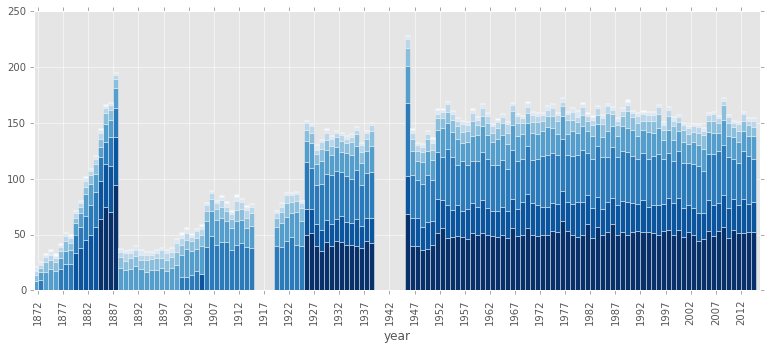

In [14]:
ax = matches_per_stage.plot(kind='bar', 
                       figsize=(13,5), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

In [15]:
matches_per_stage.loc[1903:1905]

stage_r,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
year,,,,,,,,
1903,NaN,NaN,14,21,9,4,2,1
1904,NaN,NaN,17,20,10,6,2,1
1905,NaN,15,NaN,25,10,5,3,1


In [16]:
fac2[(fac2.year == 1905)].groupby('round').first().sort_values('stage')

,Unnamed: 0,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round_id,stage,year,year_id,team,home,stage_r
round,,,,,,,,,,,,,,,,
Extra Preliminary Round,4972,0,Rotherham Town,14.09.04,1,Thornhill United,21199.00000,True,True,10959.00000,1,1905,71267,Thornhill United,True,1
Preliminary Round,5129,0,Leadgate Park,24.09.04,1,Stanley United,21250.00000,True,True,10966.00000,2,1905,71267,Stanley United,True,2
First Qualifying Round,5055,2,Oswestry United,10.10.04,3,Druids,21324.00000,True,True,10962.00000,3,1905,71267,Druids,True,3
Second Qualifying Round,4983,4,Civil Service,22.10.04,4,Kensal Rise,21369.00000,True,True,10967.00000,4,1905,71267,Kensal Rise,True,4
Third Qualifying Round,5193,2,Kettering Town,07.11.04,1,Wellingborough Town,21414.00000,True,True,10971.00000,5,1905,71267,Wellingborough Town,True,5
Fourth Qualifying Round,5266,0,Glossop,23.11.04,1,Stockport County,21447.00000,True,True,10964.00000,6,1905,71267,Stockport County,True,6
Fifth Qualifying Round,5242,2,Sunderland West End,07.12.04,1,Bishop Auckland,21461.00000,True,True,10960.00000,7,1905,71267,Bishop Auckland,True,7
Intermediate Round,6144,1,Fulham,23.01.05,0,Manchester United,21489.00000,False,True,10965.00000,8,1905,71267,Manchester United,True,8
Sixth Qualifying Round,5180,2,Barnsley,15.12.04,1,Burslem Port Vale,21472.00000,True,True,10970.00000,9,1905,71267,Burslem Port Vale,True,9


The dates show us that the intermediate and 6th qualifying stages are in wrong order (also on data source). Will now check if any other intermediate stages are affected.

In [17]:
fac2[fac2['round'] == 'Intermediate Round'].groupby('year').first()

,Unnamed: 0,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round,round_id,stage,year_id,team,home,stage_r
year,,,,,,,,,,,,,,,,
1901,3971,1,Bristol City,14.01.01,2,Reading,20292,False,True,Intermediate Round,10915,7,71263,Reading,True,9
1902,4302,0,Millwall Athletic,18.12.01,1,Bristol Rovers,20570,False,True,Intermediate Round,10927,7,71264,Bristol Rovers,True,9
1903,4585,0,Bristol Rovers,22.12.02,2,Millwall Athletic,20847,False,True,Intermediate Round,10939,7,71265,Millwall Athletic,True,9
1904,4955,1,Small Heath,11.01.04,3,Manchester United,21149,False,True,Intermediate Round,10952,8,71266,Manchester United,True,9
1905,6144,1,Fulham,23.01.05,0,Manchester United,21489,False,True,Intermediate Round,10965,8,71267,Manchester United,True,8


In [18]:
fac2[(fac2.year == 1901)].groupby('round').first().sort_values('stage')

,Unnamed: 0,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round_id,stage,year,year_id,team,home,stage_r
round,,,,,,,,,,,,,,,,
Preliminary Round,3812,10,Woodford,27.09.00,1,Leytonstone,20087,True,True,10916,1,1901,71263,Leytonstone,True,3
First Qualifying Round,3983,4,Gresley,15.10.00,2,Burton Wanderers,20149,True,True,10912,2,1901,71263,Burton Wanderers,True,4
Second Qualifying Round,3924,0,Sittingbourne,29.10.00,2,Maidstone United (1),20196,True,True,10917,3,1901,71263,Maidstone United (1),True,5
Third Qualifying Round,4044,1,Gainsborough Trinity,12.11.00,3,Lincoln City,20244,True,True,10920,4,1901,71263,Lincoln City,True,6
Fourth Qualifying Round,4146,1,Chatham,21.11.00,5,Clapton,20266,True,True,10914,5,1901,71263,Clapton,True,7
Fifth Qualifying Round,4170,3,West Ham United,12.12.00,2,Clapton,20280,True,True,10910,6,1901,71263,Clapton,True,8
Intermediate Round,3971,1,Bristol City,14.01.01,2,Reading,20292,False,True,10915,7,1901,71263,Reading,True,9
First Round Proper,3904,1,Newton Heath,13.02.01,7,Burnley,20309,False,True,10913,8,1901,71263,Burnley,True,10
Second Round Proper,4182,3,Aston Villa,27.02.01,1,Nottingham Forest,20321,False,True,10918,9,1901,71263,Nottingham Forest,True,11


Modified above code for each year, only 1905 incorrect, need to fix now

In [19]:
fac2.loc[(fac2['year'] == 1905) & (fac2['round'] == 'Intermediate Round'), 'stage'] = 9
fac2.loc[(fac2['year'] == 1905) & (fac2['round'] == 'Sixth Qualifying Round'), 'stage'] = 8

In [20]:
fac2[(fac2.year == 1905)].groupby('round').first().sort_values('stage')

,Unnamed: 0,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round_id,stage,year,year_id,team,home,stage_r
round,,,,,,,,,,,,,,,,
Extra Preliminary Round,4972,0,Rotherham Town,14.09.04,1,Thornhill United,21199.00000,True,True,10959.00000,1,1905,71267,Thornhill United,True,1
Preliminary Round,5129,0,Leadgate Park,24.09.04,1,Stanley United,21250.00000,True,True,10966.00000,2,1905,71267,Stanley United,True,2
First Qualifying Round,5055,2,Oswestry United,10.10.04,3,Druids,21324.00000,True,True,10962.00000,3,1905,71267,Druids,True,3
Second Qualifying Round,4983,4,Civil Service,22.10.04,4,Kensal Rise,21369.00000,True,True,10967.00000,4,1905,71267,Kensal Rise,True,4
Third Qualifying Round,5193,2,Kettering Town,07.11.04,1,Wellingborough Town,21414.00000,True,True,10971.00000,5,1905,71267,Wellingborough Town,True,5
Fourth Qualifying Round,5266,0,Glossop,23.11.04,1,Stockport County,21447.00000,True,True,10964.00000,6,1905,71267,Stockport County,True,6
Fifth Qualifying Round,5242,2,Sunderland West End,07.12.04,1,Bishop Auckland,21461.00000,True,True,10960.00000,7,1905,71267,Bishop Auckland,True,7
Sixth Qualifying Round,5180,2,Barnsley,15.12.04,1,Burslem Port Vale,21472.00000,True,True,10970.00000,8,1905,71267,Burslem Port Vale,True,9
Intermediate Round,6144,1,Fulham,23.01.05,0,Manchester United,21489.00000,False,True,10965.00000,9,1905,71267,Manchester United,True,8


In [21]:
fac2.to_csv('facup_v3.csv', index = False)

In [22]:
#re-creating new column 'stage_r that 'hangs' stages off final (=14) rather than initial round

def set_stages(grp):
    stages = grp['stage'].max()
    grp['stage_r'] = grp['stage'] - stages + 14
    return grp

fac3 = fac2.groupby(['year']).apply(set_stages)

In [23]:
fac3[(fac3.year == 1905)].groupby('round').first().sort_values('stage')

,Unnamed: 0,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round_id,stage,year,year_id,team,home,stage_r
round,,,,,,,,,,,,,,,,
Extra Preliminary Round,4972,0,Rotherham Town,14.09.04,1,Thornhill United,21199.00000,True,True,10959.00000,1,1905,71267,Thornhill United,True,1
Preliminary Round,5129,0,Leadgate Park,24.09.04,1,Stanley United,21250.00000,True,True,10966.00000,2,1905,71267,Stanley United,True,2
First Qualifying Round,5055,2,Oswestry United,10.10.04,3,Druids,21324.00000,True,True,10962.00000,3,1905,71267,Druids,True,3
Second Qualifying Round,4983,4,Civil Service,22.10.04,4,Kensal Rise,21369.00000,True,True,10967.00000,4,1905,71267,Kensal Rise,True,4
Third Qualifying Round,5193,2,Kettering Town,07.11.04,1,Wellingborough Town,21414.00000,True,True,10971.00000,5,1905,71267,Wellingborough Town,True,5
Fourth Qualifying Round,5266,0,Glossop,23.11.04,1,Stockport County,21447.00000,True,True,10964.00000,6,1905,71267,Stockport County,True,6
Fifth Qualifying Round,5242,2,Sunderland West End,07.12.04,1,Bishop Auckland,21461.00000,True,True,10960.00000,7,1905,71267,Bishop Auckland,True,7
Sixth Qualifying Round,5180,2,Barnsley,15.12.04,1,Burslem Port Vale,21472.00000,True,True,10970.00000,8,1905,71267,Burslem Port Vale,True,8
Intermediate Round,6144,1,Fulham,23.01.05,0,Manchester United,21489.00000,False,True,10965.00000,9,1905,71267,Manchester United,True,9


In [24]:
nq3 = fac3[fac3['qualifier'] == False]

In [25]:
matches_per_stage = nq3.groupby(['year', 'stage_r'])['match_id'].nunique().unstack().reindex(range(1872,2016))

matches_per_stage.loc[1905]

stage_r
7    NaN
8    NaN
9     15
10    25
11    10
12     5
13     3
14     1
Name: 1905, dtype: float64

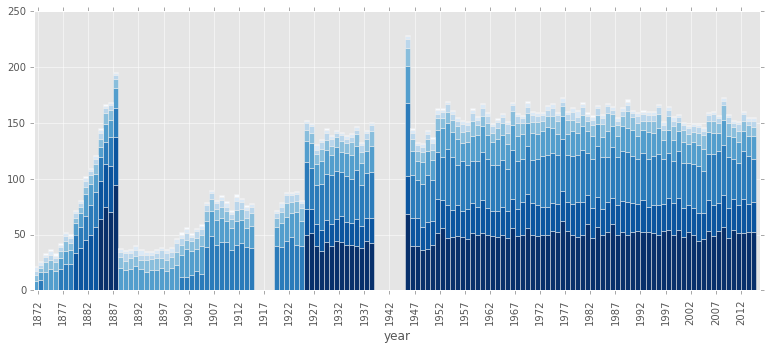

In [26]:
ax = matches_per_stage.plot(kind='bar', 
                       figsize=(13,5), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()